In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(3750, 1) (3750, 1)


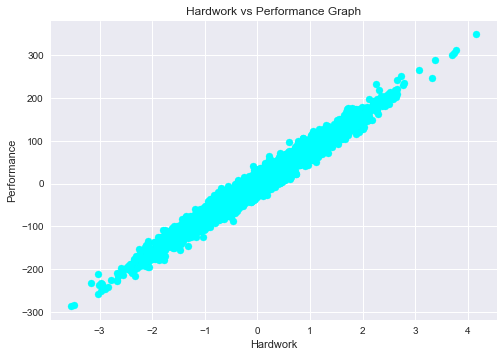

In [9]:
X=pd.read_csv('./Training Data/Linear_X_Train.csv')
y=pd.read_csv('./Training Data/Linear_Y_Train.csv')

X=X.values
y=y.values

print(X.shape,y.shape)
u=X.mean()
std=X.std()
X=(X-u)/std

plt.style.use('seaborn')
plt.scatter(X,y,color='aqua')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [54]:
def hypothesis(x,thetha):
    y_=thetha[0]+thetha[1]*x
    return y_

def error(X,Y,thetha):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(X[i],thetha)
        total_error+=(y_ - Y[i])**2
    return (total_error/m)

def gradient(X,Y,thetha):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        x=X[i]
        y=Y[i]
        y_=hypothesis(x,thetha)
        grad[0]+=(y_ - y)
        grad[1]+=(y_ - y)*x
    return grad/m

def gradientdescent(X,Y,max_steps=100,learning_rate=0.1):
    thetha=np.zeros((2,))
    thetha_list=[]
    error_list=[]
    
    for i in range(max_steps):
        grad=gradient(X,Y,thetha)
        e=error(X,Y,thetha)[0]
        
        thetha[0]=thetha[0] - learning_rate*grad[0]
        thetha[1]=thetha[1] - learning_rate*grad[1]
        
        thetha_list.append((thetha[0],thetha[1]))
        error_list.append(e)
        
    return thetha,thetha_list,error_list

In [55]:
thetha,thetha_list,error_list=gradientdescent(X,y)

In [56]:
e=error(X,y,thetha)
print(e)

[190.95558388]


In [57]:
lists=[]

In [58]:
lists.append(e)
print(lists)

[array([190.95558388])]


In [59]:
print(type(e))
print(e.shape)

<class 'numpy.ndarray'>
(1,)


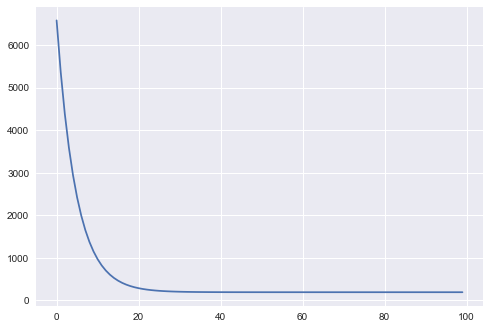

In [124]:
plt.plot(error_list)
plt.show()

In [125]:
y_=hypothesis(X,thetha)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


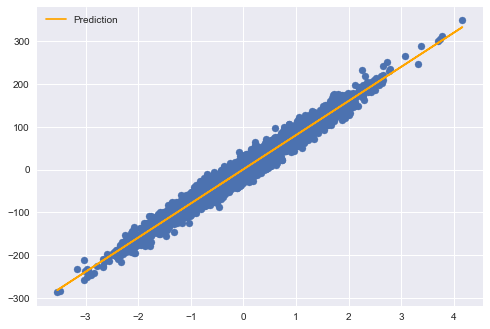

In [126]:
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label='Prediction')
plt.legend()
plt.show()

In [127]:
x_test=pd.read_csv('Test Cases/Linear_X_Test.csv').values
y_test=hypothesis(x_test,thetha)

In [129]:
df=pd.DataFrame(data=y_test,columns=["y"])

In [132]:
df.to_csv('y_predict.csv',index=False)